In [368]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_bostan
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure



%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) #adjust the configuration of the plots we'll creat




ImportError: cannot import name 'load_bostan' from 'sklearn.datasets' (/Users/halef/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/__init__.py)

# In this project, we will analyse the sales price of ford cars
# In addition, we will make a model that predict the ford car sales.

In [273]:
path= ("/Users/halef/Desktop/JupyterLab/dataset/ford/ford.csv")
df = pd.read_csv(path, sep=",")

In [274]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [275]:
df.shape

(17966, 9)

In [276]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [277]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In this project, km and hour will be used. Thus, two new columns will be created from exsiting columns such as "mileage" and "mpg".

To convert miles per gallon to km per liter, we divide the "mpg" by 2.352.
In he same way, to convert miles to km, we multiply the "mileage" by 1.609


The aim of this convervation is that km and liter are used a lot more instead of miles and gallon.

Therefore, to reach more people, this convervation will be made.

In [278]:
df["km_per_liter"] = df["mpg"] / 2.352


In [279]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km_per_liter
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,24.532313
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,24.532313
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,24.532313
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,17.134354
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,20.705782


In [280]:
df["km_age"] = df["mileage"]* 1.609

In [281]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,24.532313,25653.896
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,24.532313,14614.547
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,24.532313,20041.704
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,17.134354,16830.140
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,20.705782,2384.538


In [282]:
df = df.drop(["mileage", "mpg"], axis=1)

In [283]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.532313,25653.896
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.532313,14614.547
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.532313,20041.704
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.134354,16830.140
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.705782,2384.538


In [284]:
# converting values into two decimal.
two_decimal = lambda x: round(x, 2)

In [285]:
two_decimal(1222.9323)

1222.93

In [286]:
df["km_per_liter"] = df["km_per_liter"].apply(two_decimal)
df["km_age"] = df["km_age"].apply(two_decimal)

In [287]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653.90
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614.55
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041.70
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830.14
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384.54


In [288]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
fuelType         object
tax               int64
engineSize      float64
km_per_liter    float64
km_age          float64
dtype: object

In [289]:
convert_int = lambda x: int(x)

In [290]:
convert_int(12.44)

12

In [291]:
df["km_age"] = df["km_age"].apply(convert_int)

In [292]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384


In [293]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
fuelType         object
tax               int64
engineSize      float64
km_per_liter    float64
km_age            int64
dtype: object

In [294]:
df.isna().sum() / df.shape[0]*100 #null values in data, but there is no null value.

model           0.0
year            0.0
price           0.0
transmission    0.0
fuelType        0.0
tax             0.0
engineSize      0.0
km_per_liter    0.0
km_age          0.0
dtype: float64

In [295]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384


In [296]:
# I wonder why taxes are 0 in some columns
df[df["tax"]==0].head(15)

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
12,Fiesta,2017,11000,Manual,Petrol,0,1.0,27.93,33753
24,Fiesta,2014,6795,Manual,Petrol,0,1.0,27.93,56796
27,Fiesta,2015,8299,Manual,Petrol,0,1.0,27.93,41729
30,Fiesta,2016,7999,Manual,Diesel,0,1.5,33.38,97714
33,Fiesta,2013,7236,Manual,Petrol,0,1.0,27.93,62895
50,Fiesta,2016,6000,Manual,Petrol,0,1.0,27.93,76609
65,Fiesta,2013,5998,Manual,Diesel,0,1.5,32.48,71285
70,Fiesta,2013,7490,Manual,Petrol,0,1.0,27.93,40225
73,Fiesta,2014,6360,Manual,Petrol,0,1.0,27.93,78282
74,Fiesta,2014,6270,Manual,Petrol,0,1.0,27.93,97968


In [297]:
# how many cars have 0 tax.
df[df["tax"]==0].count()

model           2153
year            2153
price           2153
transmission    2153
fuelType        2153
tax             2153
engineSize      2153
km_per_liter    2153
km_age          2153
dtype: int64

In [298]:
# There are 2153 cars without taxes.
# So we need to understand why these cars have zero tax.
# this is actually annual tax.
# According to my research, in some states, there is no tax for cars

In [299]:
# In this project, 

In [300]:
df["transmission"].head(16)

0     Automatic
1        Manual
2        Manual
3        Manual
4     Automatic
5        Manual
6        Manual
7        Manual
8     Automatic
9        Manual
10       Manual
11       Manual
12       Manual
13    Semi-Auto
14    Semi-Auto
15       Manual
Name: transmission, dtype: object

In [301]:
# how many kinds of transmission.
df["transmission"].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [302]:
# There are 3 kinds of transmission in cars.
# For correlation test, we need to convert string into numerical value.

In [303]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384


In [304]:
df['Date'] = pd.to_datetime(df['year'], format='%Y')

In [311]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age,Date
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653,2017-01-01
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614,2018-01-01
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041,2017-01-01
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830,2019-01-01
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384,2019-01-01


In [340]:
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
corr_df.style.background_gradient(cmap='RdBu_r')

,year,price,tax,engineSize,km_per_liter,km_age
year,1.000000,0.636009,0.298506,-0.137311,-0.023014,-0.707818
price,0.636009,1.000000,0.406857,0.411178,-0.346445,-0.530659
tax,0.298506,0.406857,1.000000,0.184363,-0.502965,-0.260451
engineSize,-0.137311,0.411178,0.184363,1.000000,-0.260420,0.215035
km_per_liter,-0.023014,-0.346445,-0.502965,-0.260420,1.000000,0.120129
km_age,-0.707818,-0.530659,-0.260451,0.215035,0.120129,1.000000


In [342]:
corr_df.style.background_gradient(cmap="coolwarm")

,year,price,tax,engineSize,km_per_liter,km_age
year,1.000000,0.636009,0.298506,-0.137311,-0.023014,-0.707818
price,0.636009,1.000000,0.406857,0.411178,-0.346445,-0.530659
tax,0.298506,0.406857,1.000000,0.184363,-0.502965,-0.260451
engineSize,-0.137311,0.411178,0.184363,1.000000,-0.260420,0.215035
km_per_liter,-0.023014,-0.346445,-0.502965,-0.260420,1.000000,0.120129
km_age,-0.707818,-0.530659,-0.260451,0.215035,0.120129,1.000000


In [343]:
corr_df.style.background_gradient(cmap="BrBG_r")

,year,price,tax,engineSize,km_per_liter,km_age
year,1.000000,0.636009,0.298506,-0.137311,-0.023014,-0.707818
price,0.636009,1.000000,0.406857,0.411178,-0.346445,-0.530659
tax,0.298506,0.406857,1.000000,0.184363,-0.502965,-0.260451
engineSize,-0.137311,0.411178,0.184363,1.000000,-0.260420,0.215035
km_per_liter,-0.023014,-0.346445,-0.502965,-0.260420,1.000000,0.120129
km_age,-0.707818,-0.530659,-0.260451,0.215035,0.120129,1.000000


In [366]:
df['price'].corr(df['engineSize'])


0.41117808792047467

<AxesSubplot:xlabel='year', ylabel='price'>

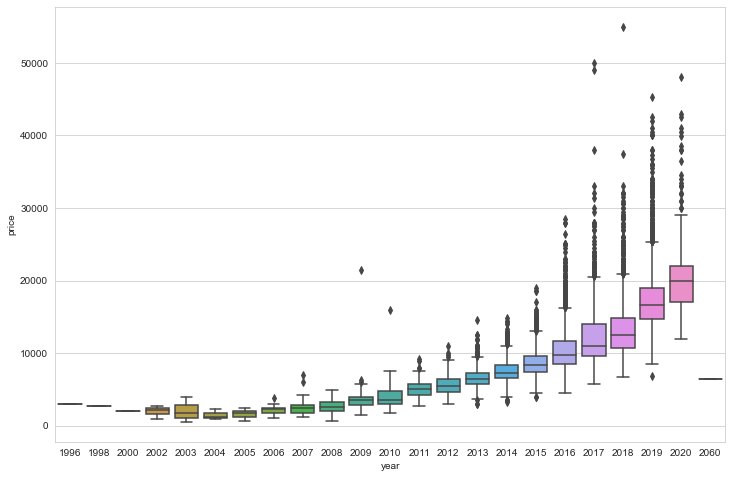

In [367]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'year', y = 'price', data = df)

/Users/halef/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

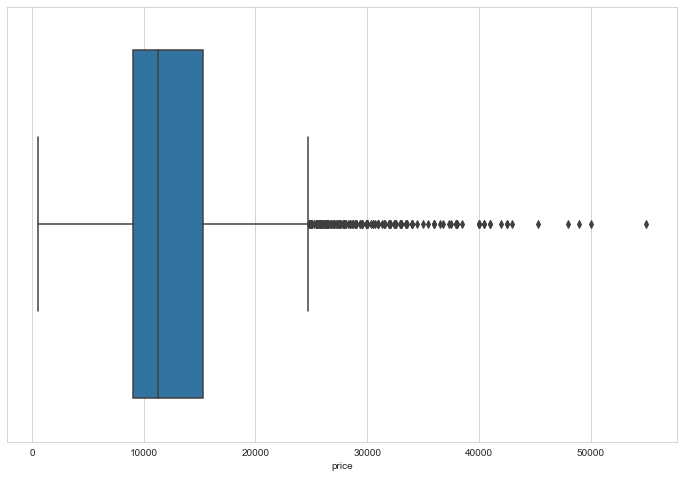

In [370]:
sns.boxplot(df['price'])

In [377]:
print(np.percentile(df.price, 25))  # Q1
print(np.percentile(df.price, 50))  #median
print(np.percentile(df.price, 75))  # Q3



8999.0
11291.0
15299.0


NameError: name 'X' is not defined

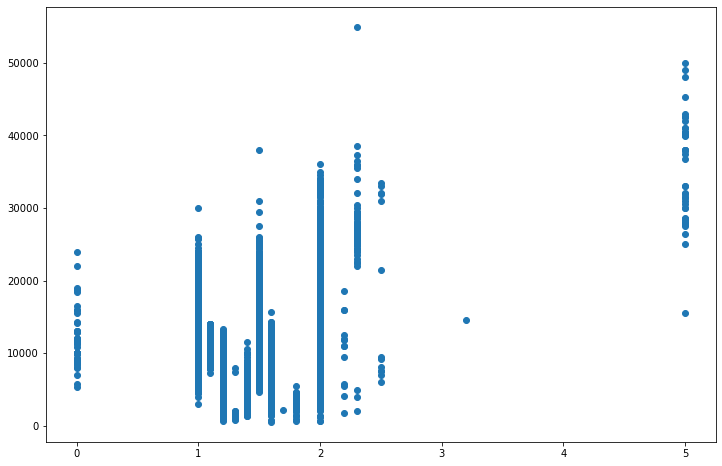

In [345]:
plt.scatter(df["engineSize"], df["price"])
plt.plot(df["engineSize"], Y_, color='red')
plt.show()

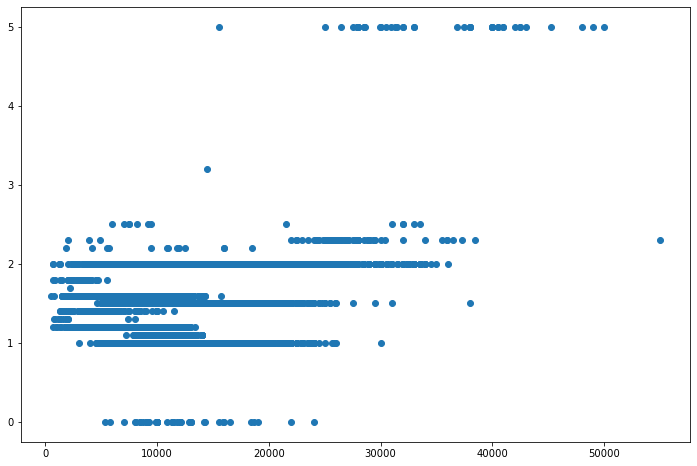

In [347]:
plt.scatter(x=df["price"], y=df["engineSize"])

In [352]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age,Date
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,24.53,25653,2017-01-01
1,Focus,2018,14000,Manual,Petrol,150,1.0,24.53,14614,2018-01-01
2,Focus,2017,13000,Manual,Petrol,150,1.0,24.53,20041,2017-01-01
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,17.13,16830,2019-01-01
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,20.71,2384,2019-01-01


<AxesSubplot:xlabel='price', ylabel='km_per_liter'>

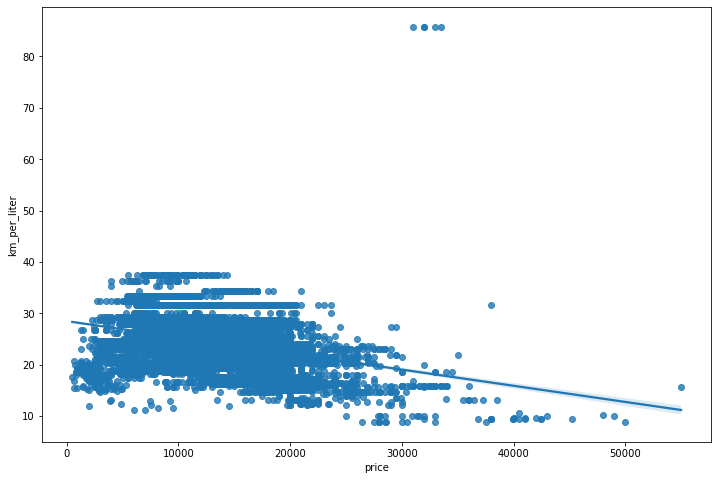

In [365]:
sns.regplot(x="price", y="km_per_liter", data=df)

In [ ]:

"""
As you can see on the table, you

"""

In [257]:
corr_df = df.corr(method="pearson")

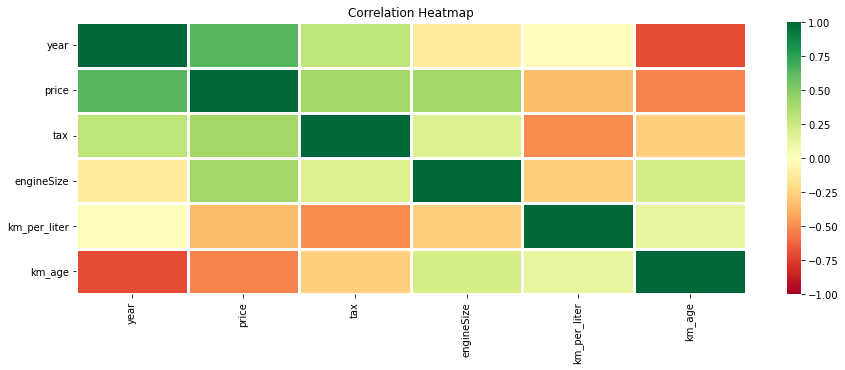

In [332]:
plt.figure(figsize = (15,5))
heat_map = sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , linewidths=2.5, annot_kws={'size': 5})
plt.yticks(rotation=0) 
plt.xticks(rotation=90)

heat_map.set(title="Correlation Heatmap")

plt.show()


,year,price,tax,engineSize,km_per_liter,km_age
year,1.000000,0.636009,0.298506,-0.137311,-0.023014,-0.707818
price,0.636009,1.000000,0.406857,0.411178,-0.346445,-0.530659
tax,0.298506,0.406857,1.000000,0.184363,-0.502965,-0.260451
engineSize,-0.137311,0.411178,0.184363,1.000000,-0.260420,0.215035
km_per_liter,-0.023014,-0.346445,-0.502965,-0.260420,1.000000,0.120129
km_age,-0.707818,-0.530659,-0.260451,0.215035,0.120129,1.000000


<Figure size 1440x720 with 0 Axes>

In [231]:
df["transmission"].head(10)

0    Automatic
1       Manual
2       Manual
3       Manual
4    Automatic
5       Manual
6       Manual
7       Manual
8    Automatic
9       Manual
Name: transmission, dtype: object

In [199]:
df["transmission"].astype('category').cat.codes

0        0
1        1
2        1
3        1
4        0
        ..
17961    1
17962    1
17963    1
17964    1
17965    1
Length: 17966, dtype: int8

In [195]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,km_per_liter,km_age
0,Fiesta,2017,12000,0,Petrol,150,1.0,24.53,25653
1,Focus,2018,14000,1,Petrol,150,1.0,24.53,14614
2,Focus,2017,13000,1,Petrol,150,1.0,24.53,20041
3,Fiesta,2019,17500,1,Petrol,145,1.5,17.13,16830
4,Fiesta,2019,16500,0,Petrol,145,1.0,20.71,2384


In [ ]:
# Automatic = 0
# Manual = 1
# Semi-Auto = 2

In [137]:
print(df['price'].corr(df['transmission']))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<AxesSubplot:xlabel='year', ylabel='price'>

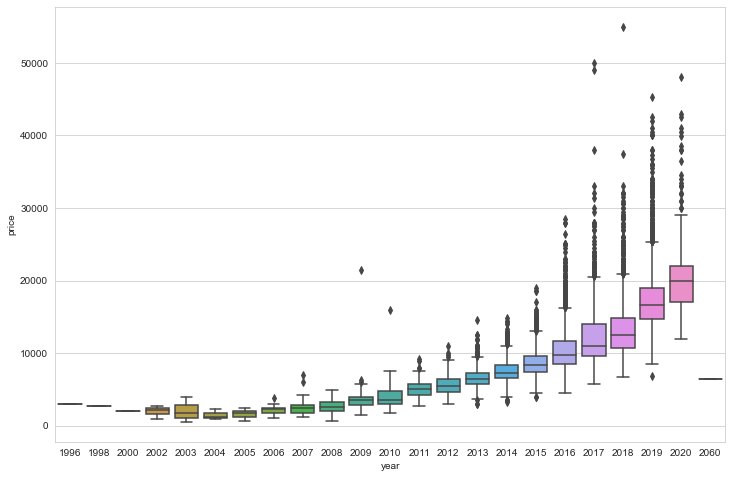

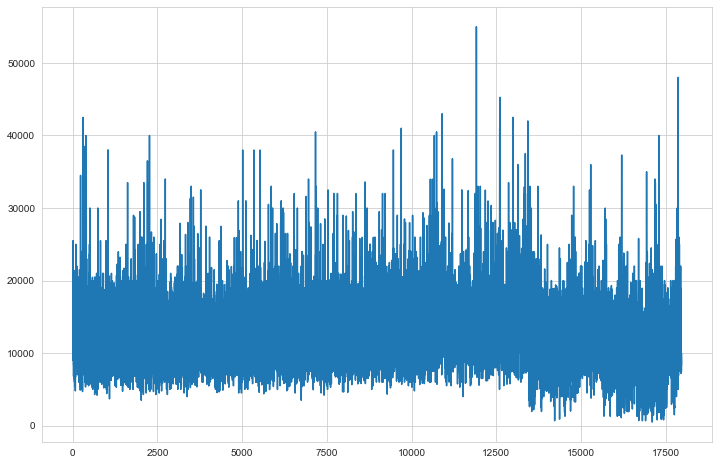

In [147]:
plt.plot(df["price"],label='year')